In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load Dataset

In [2]:
df2d = pd.read_csv('dataset1.csv')
df3d = pd.read_csv('dataset2.csv')

In [3]:
df2d.head()

,8.228429240780527065e-01,1.135491058107753304e+00
0,1.292526,1.600180
1,0.869815,1.370494
2,2.097264,1.710771
3,2.024974,3.001641
4,1.799584,0.174340


In [4]:
df3d.head()

,-6.126607425458740153e+00,1.764511299313616988e+01,6.095543727848264481e+00
0,5.602577,5.034192,-10.091931
1,2.179934,9.876991,7.160241
2,6.088796,16.889159,-1.150638
3,6.436043,1.070221,1.176709
4,-0.798785,6.267833,7.851932


In [5]:
data2d1 = df2d.to_numpy()
print(type(df2d))
print(type(data2d1))
print(data2d1.shape)
print(data2d1.shape[0])
print(data2d1[560])

data2d = [ np.array([j for j in i]) for i in data2d1 ]
print(type(data2d))
# data2d = np.array(data2d)
# print(type(data2d))
#print(data2d.shape)
print(data2d[560])
test = random.sample(data2d,4)
test2 = []
print(set([tuple(i) for i in test]) != set([tuple(j) for j in test2]))
print(len(data2d1[:,0]))

data3d1 = df3d.to_numpy()
print(data3d1[560])
data3d = [ np.array([j for j in i]) for i in data3d1 ]
print(data3d[560])

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(3499, 2)
3499
[0.81224571 0.0739168 ]
<class 'list'>
[0.81224571 0.0739168 ]
True
3499
[ 6.45942591 18.91153674  0.606744  ]
[ 6.45942591 18.91153674  0.606744  ]


# K-means random initialization dataset 1

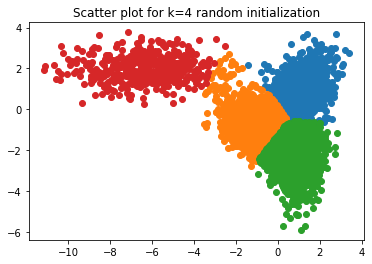

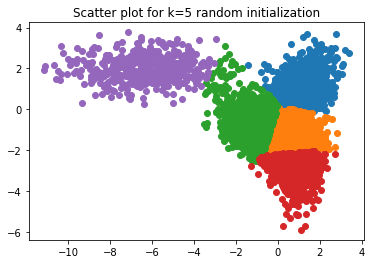

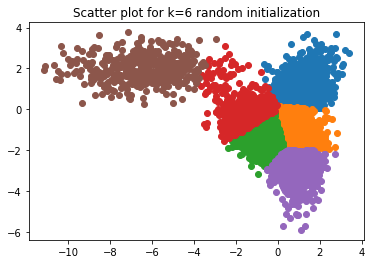

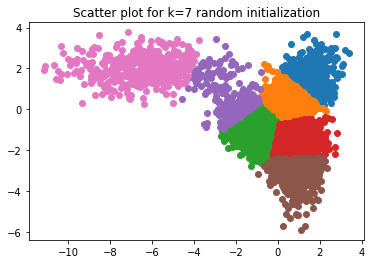

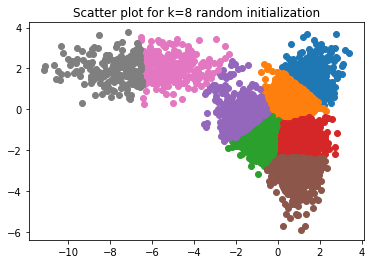

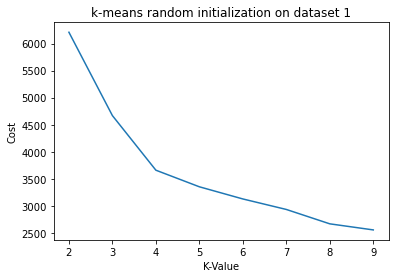

In [6]:
k_costs = []
k_value = []
max_iter = 20
for k in range(2,10):
    centers = random.sample(data2d,k)
    updated_centers=[]
    #while ( set([tuple(c) for c in centers]) != set([tuple(uc) for uc in updated_centers]) ):
    for cnt in range(max_iter):
        clusters = {}
        
        for i in data2d:
            norm_dist = [(np.linalg.norm(i-pt), index) for index,pt in enumerate(centers)]
            min_dist = min(norm_dist)
            min_index = min_dist[1]
            try:
                clusters[min_index].append(i)
            except KeyError:
                clusters[min_index] = [i]
        
        updated_centers = []
        keys = sorted(clusters.keys())
        for key in keys:
            updated_centers.append(np.mean(clusters[key],axis=0))
            
        centers = updated_centers
    
    error = 0
    for key in clusters.keys():
        for j in clusters[key]:
            error += np.linalg.norm(j-centers[key])
    k_costs.append(error)
    k_value.append(k)
    #print(cnt)
    
    if k in [4,5,6,7,8]:
        fig,ax = plt.subplots()
        ax.set_title('Scatter plot for k={} random initialization'.format(k))
        for key in clusters.keys():
            ax.scatter([l[0] for l in clusters[key]], [l[1] for l in clusters[key]])
        plt.savefig("kmeans_{}_randomd1.png".format(k))

fig,ax = plt.subplots()
ax.set_title('k-means random initialization on dataset 1')
ax.set_xlabel('K-Value')
ax.set_ylabel('Cost')
ax.plot(k_value, k_costs)
plt.savefig("kcostskmeansrandomd1.png")

# K-means k++ initialization dataset 1

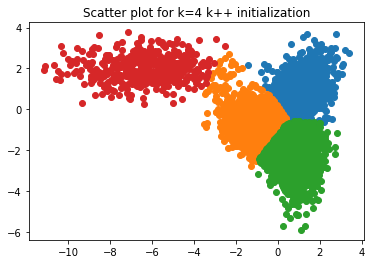

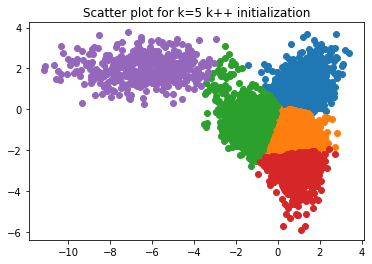

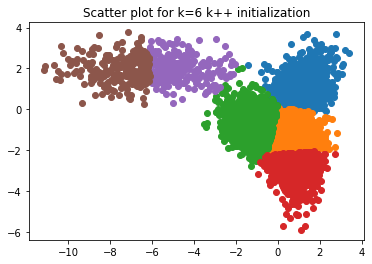

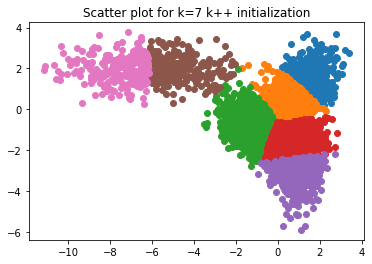

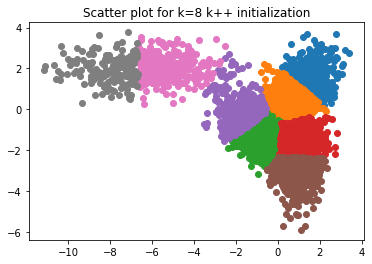

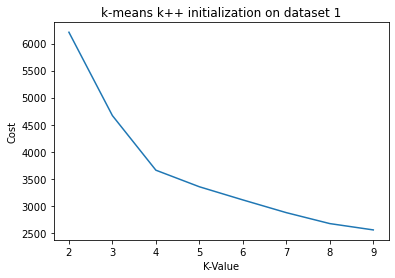

In [7]:
k_costs = []
k_value = []
max_iter = 20
for k in range(2,10):
    centers = random.sample(data2d,1)
    for m in range(1,k):
        squared_dist = []
        random_val = random.random()
        for pts in data2d:
            norm_dist = [(np.linalg.norm(pts-pt), index) for index,pt in enumerate(centers)]
            min_dist = min(norm_dist)
            squared_dist.append(min_dist[0]**2)
        squared_dist = np.array(squared_dist)
        prob = squared_dist/np.sum(squared_dist)
        prob_sum = 0
        for p in range(len(prob)):
            prob_sum += prob[p]
            if prob_sum > random_val:
                centers.append(data2d[p])
                break
    
    updated_centers=[]
    #while ( set([tuple(c) for c in centers]) != set([tuple(uc) for uc in updated_centers]) ):
    for cnt in range(max_iter):
        clusters = {}
        
        for i in data2d:
            norm_dist = [(np.linalg.norm(i-pt), index) for index,pt in enumerate(centers)]
            min_dist = min(norm_dist)
            min_index = min_dist[1]
            try:
                clusters[min_index].append(i)
            except KeyError:
                clusters[min_index] = [i]
        
        updated_centers = []
        keys = sorted(clusters.keys())
        for key in keys:
            updated_centers.append(np.mean(clusters[key],axis=0))
            
        centers = updated_centers
    
    error = 0
    for key in clusters.keys():
        for j in clusters[key]:
            error += np.linalg.norm(j-centers[key])
    k_costs.append(error)
    k_value.append(k)
    #print(cnt)
    
    if k in [4,5,6,7,8]:
        fig,ax = plt.subplots()
        ax.set_title('Scatter plot for k={} k++ initialization'.format(k))
        for key in clusters.keys():
            ax.scatter([l[0] for l in clusters[key]], [l[1] for l in clusters[key]])
        plt.savefig("kmeans_{}_kplusd1.png".format(k))

fig,ax = plt.subplots()
ax.set_title('k-means k++ initialization on dataset 1')
ax.set_xlabel('K-Value')
ax.set_ylabel('Cost')
ax.plot(k_value, k_costs)
plt.savefig("kcostskmeanskplusd1.png")

# K-means random initialization dataset 2

C:\Users\KENILS~1\AppData\Local\Temp/ipykernel_8344/1045257419.py:37: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


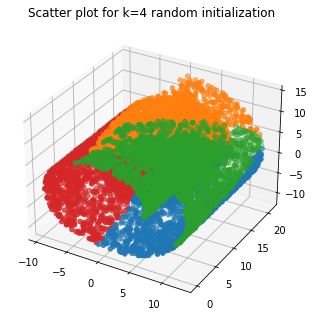

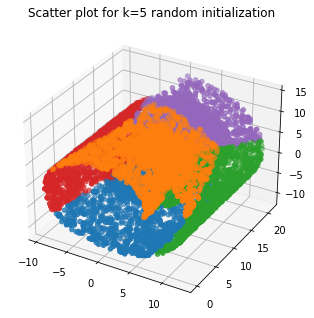

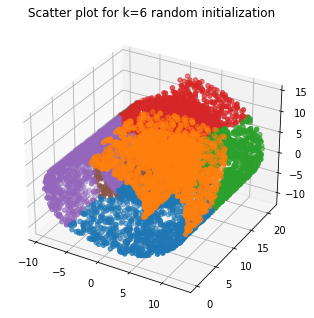

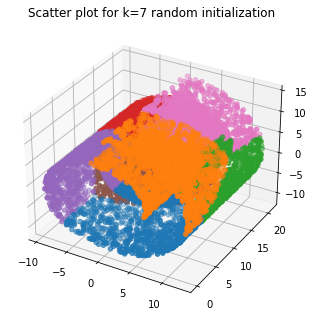

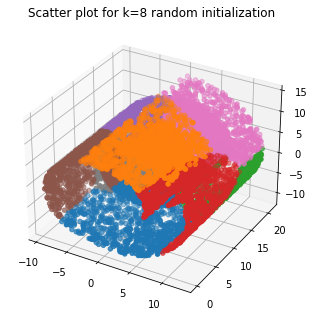

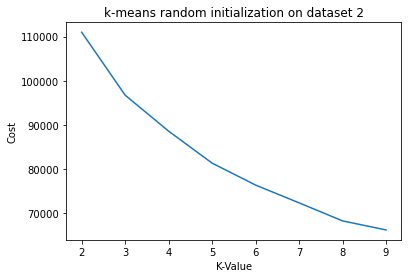

In [8]:
k_costs = []
k_value = []
max_iter = 20
for k in range(2,10):
    centers = random.sample(data3d,k)
    updated_centers=[]
    #while ( set([tuple(c) for c in centers]) != set([tuple(uc) for uc in updated_centers]) ):
    for cnt in range(max_iter):
        clusters = {}
        
        for i in data3d:
            norm_dist = [(np.linalg.norm(i-pt), index) for index,pt in enumerate(centers)]
            min_dist = min(norm_dist)
            min_index = min_dist[1]
            try:
                clusters[min_index].append(i)
            except KeyError:
                clusters[min_index] = [i]
        
        updated_centers = []
        keys = sorted(clusters.keys())
        for key in keys:
            updated_centers.append(np.mean(clusters[key],axis=0))
            
        centers = updated_centers
    
    error = 0
    for key in clusters.keys():
        for j in clusters[key]:
            error += np.linalg.norm(j-centers[key])
    k_costs.append(error)
    k_value.append(k)
    #print(cnt)
    
    if k in [4,5,6,7,8]:
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.set_title('Scatter plot for k={} random initialization'.format(k))
        for key in clusters.keys():
            ax.scatter([l[0] for l in clusters[key]], [l[1] for l in clusters[key]], [l[2] for l in clusters[key]])
        plt.savefig("kmeans_{}_randomd2.png".format(k))

fig,ax = plt.subplots()
ax.set_title('k-means random initialization on dataset 2')
ax.set_xlabel('K-Value')
ax.set_ylabel('Cost')
ax.plot(k_value, k_costs)
plt.savefig("kcostskmeansrandomd2.png")

# K-means k++ initialization dataset 2

C:\Users\KENILS~1\AppData\Local\Temp/ipykernel_8344/752735514.py:53: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


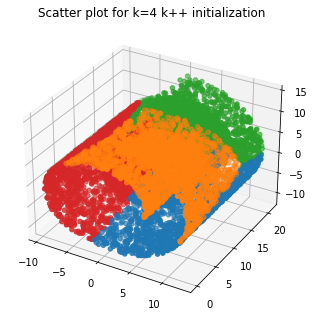

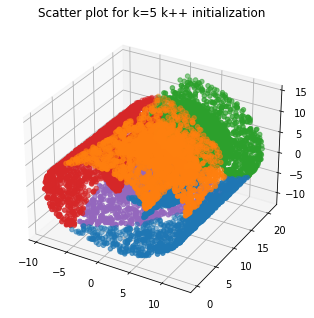

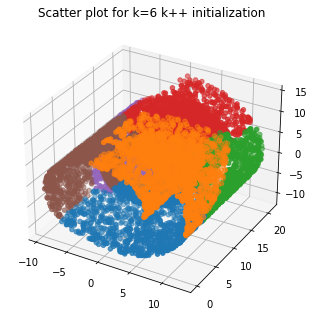

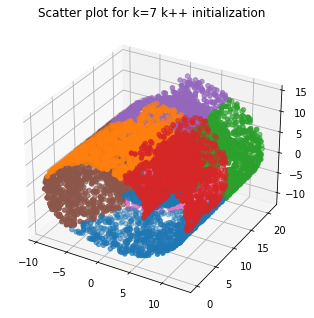

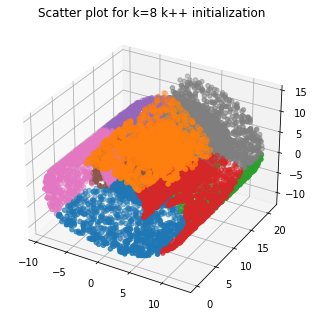

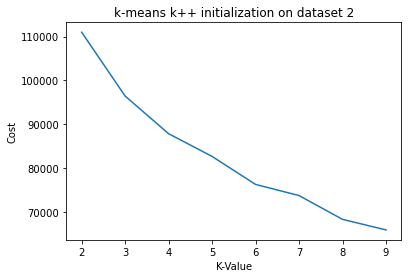

In [9]:
k_costs = []
k_value = []
max_iter = 20
for k in range(2,10):
    centers = random.sample(data3d,1)
    for m in range(1,k):
        squared_dist = []
        random_val = random.random()
        for pts in data3d:
            norm_dist = [(np.linalg.norm(pts-pt), index) for index,pt in enumerate(centers)]
            min_dist = min(norm_dist)
            squared_dist.append(min_dist[0]**2)
        squared_dist = np.array(squared_dist)
        prob = squared_dist/np.sum(squared_dist)
        prob_sum = 0
        for p in range(len(prob)):
            prob_sum += prob[p]
            if prob_sum > random_val:
                centers.append(data3d[p])
                break
                
    updated_centers=[]
    #while ( set([tuple(c) for c in centers]) != set([tuple(uc) for uc in updated_centers]) ):
    for cnt in range(max_iter):
        clusters = {}
        
        for i in data3d:
            norm_dist = [(np.linalg.norm(i-pt), index) for index,pt in enumerate(centers)]
            min_dist = min(norm_dist)
            min_index = min_dist[1]
            try:
                clusters[min_index].append(i)
            except KeyError:
                clusters[min_index] = [i]
        
        updated_centers = []
        keys = sorted(clusters.keys())
        for key in keys:
            updated_centers.append(np.mean(clusters[key],axis=0))
            
        centers = updated_centers
    
    error = 0
    for key in clusters.keys():
        for j in clusters[key]:
            error += np.linalg.norm(j-centers[key])
    k_costs.append(error)
    k_value.append(k)
    #print(cnt)
    
    if k in [4,5,6,7,8]:
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.set_title('Scatter plot for k={} k++ initialization'.format(k))
        for key in clusters.keys():
            ax.scatter([l[0] for l in clusters[key]], [l[1] for l in clusters[key]], [l[2] for l in clusters[key]])
        plt.savefig("kmeans_{}_kplusd2.png".format(k))

fig,ax = plt.subplots()
ax.set_title('k-means k++ initialization on dataset 2')
ax.set_xlabel('K-Value')
ax.set_ylabel('Cost')
ax.plot(k_value, k_costs)
plt.savefig("kcostskmeanskplusd2.png")

# HAC single linkage on dataset 1

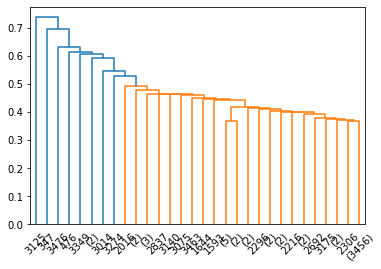

In [10]:
linked = linkage(data2d, 'single')

fig = plt.figure()
dendrogram(linked, truncate_mode = 'lastp')
plt.savefig("dendogram_single_d1")

In [11]:
for k in [4,7,9]:
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    cluster.fit_predict(data2d)
    plt.figure()
    plt.title("HAC on {} clusters with single linkage on dataset 1".format(k))
    plt.scatter(data2d1[:,0], data2d1[:,1], c=cluster.labels_)
    plt.savefig("hac_{}_singled1.png".format(k))
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# HAC average linkage on dataset 1

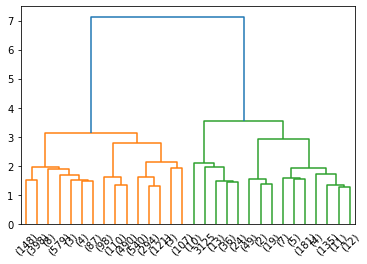

In [12]:
linked = linkage(data2d, 'average')

fig = plt.figure()
dendrogram(linked, truncate_mode = 'lastp')
plt.savefig("dendogram_average_d1")

In [13]:
for k in [2,4,6]:
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    cluster.fit_predict(data2d)
    plt.figure()
    plt.title("HAC on {} clusters with average linkage on dataset 1".format(k))
    plt.scatter(data2d1[:,0], data2d1[:,1], c=cluster.labels_)
    plt.savefig("hac_{}_averaged1.png".format(k))
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# HAC single linkage on dataset 2

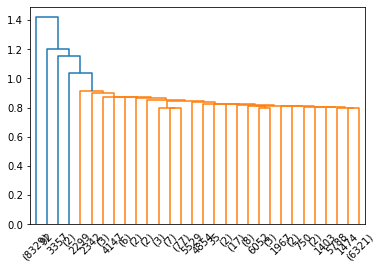

In [14]:
linked = linkage(data3d, 'single')

fig = plt.figure()
dendrogram(linked, truncate_mode = 'lastp')
plt.savefig("dendogram_single_d2")

In [15]:
for k in [2,4,5]:
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    cluster.fit_predict(data3d)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_title("HAC on {} clusters with single linkage on dataset 2".format(k))
    ax.scatter(data3d1[:,0],data3d1[:,1],data3d1[:,2],  c=cluster.labels_)
    plt.savefig("hac_{}_singled2.png".format(k))
    plt.clf()

C:\Users\KENILS~1\AppData\Local\Temp/ipykernel_8344/382986988.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
C:\Users\KENILS~1\AppData\Local\Temp/ipykernel_8344/382986988.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
C:\Users\KENILS~1\AppData\Local\Temp/ipykernel_8344/382986988.py:5: MatplotlibDeprecationWarning: Axes3D(fig) ad

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# HAC average linkage on dataset 2

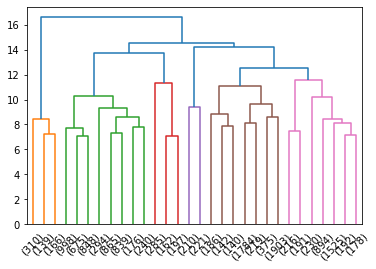

In [16]:
linked = linkage(data3d, 'average')

fig = plt.figure()
dendrogram(linked, truncate_mode = 'lastp')
plt.savefig("dendogram_average_d2")

In [17]:
for k in [6,9,11]:
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    cluster.fit_predict(data3d)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_title("HAC on {} clusters with average linkage on dataset 2".format(k))
    ax.scatter(data3d1[:,0],data3d1[:,1],data3d1[:,2],  c=cluster.labels_)
    plt.savefig("hac_{}_averaged2.png".format(k))
    plt.clf()

C:\Users\KENILS~1\AppData\Local\Temp/ipykernel_8344/2046626115.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
C:\Users\KENILS~1\AppData\Local\Temp/ipykernel_8344/2046626115.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
C:\Users\KENILS~1\AppData\Local\Temp/ipykernel_8344/2046626115.py:5: MatplotlibDeprecationWarning: Axes3D(fig)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>